# WeatherPy
## Analysis
* There is no strong relationship between latitude and humidity. however there is a slightly larger cluster of northern hemisphere cities with high humidity (above 60% humidity)



#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
from datetime import date

## Generate Cities List

In [11]:
# creating cities list
cities = []

#Generating random latitudes and longitudes
latitude = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitude = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Creating for loop to find cities from citipy using the randomly generated lat-long
for x in range(len(latitude)):
    city = citipy.nearest_city(latitude[x], longitude[x])
       
   #getting city names and country from citipy
    city_name = city.city_name + "," + city.country_code
    
    #Adding city names to the empty list
    cities.append(city_name)
    
#filtering out only the unique cities name from the list
unique_cities = set(cities)
len(unique_cities)
cities

['port elizabeth,za',
 'sitka,us',
 'khonuu,ru',
 'flinders,au',
 'ushuaia,ar',
 'bredasdorp,za',
 'mongo,td',
 'castro,cl',
 'cape town,za',
 'ipameri,br',
 'taolanaro,mg',
 'punta arenas,cl',
 'ribeira grande,pt',
 'geraldton,au',
 'bengkulu,id',
 'three hills,ca',
 'agadez,ne',
 'constitucion,mx',
 'new norfolk,au',
 'thompson,ca',
 'new norfolk,au',
 'udupi,in',
 'qaanaaq,gl',
 'tiznit,ma',
 'illoqqortoormiut,gl',
 'castro,cl',
 'bredasdorp,za',
 'arlit,ne',
 'rosemount,us',
 'cape canaveral,us',
 'kavieng,pg',
 'guerrero negro,mx',
 'cape town,za',
 'atuona,pf',
 'tasiilaq,gl',
 'aden,ye',
 'thompson,ca',
 'niksar,tr',
 'tiksi,ru',
 'severo-kurilsk,ru',
 'ushuaia,ar',
 'gamba,ga',
 'tevriz,ru',
 'naze,jp',
 'tuktoyaktuk,ca',
 'port hedland,au',
 'nizhneyansk,ru',
 'east london,za',
 'lebu,cl',
 'mataura,pf',
 'ca mau,vn',
 'leningradskiy,ru',
 'sitka,us',
 'nisia floresta,br',
 'camacha,pt',
 'east london,za',
 'cape town,za',
 'illoqqortoormiut,gl',
 'katsuura,jp',
 'puerto ayora

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

#Creating an empty list for each of the parameters
city_temperature = []
city_cloudiness = []
city_humidity = []
city_windspeed = []
city_latitudes = []
city_longitudes=[]
city_name_list = []
city_date=[]
city_country=[]
city_two=[]

# set initial count quantities for organization
count_one = 0
set_one = 1

#converting Temperature from Kelvin to Farenheit
units = "imperial"

#Creating a for loop to get data from openweathermap for each city in the city list
for city in unique_cities:
    
    #Creating specific url for each city using the api_key
    target_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    try:
        #Converting the weather data to a json file
        city_data = requests.get(target_url).json()
        
        if ( city_data["main"] and  city_data["clouds"] and city_data["wind"] and city_data["coord"]):
            
            #Retrieve name of each city
            city_name = city_data["name"]
            city_name_list.append(city_name)
        
            #retriving temperature for each city from the weather data and adding it to the empty list    
            city_temp = city_data["main"]["temp_max"]
            city_temperature.append(city_temp)

            #retriving cloudiness for each city from the weather data and adding it to the empty list  
            city_cloud = city_data["clouds"]["all"]
            city_cloudiness.append(city_cloud)

            #retriving humidity for each city from the weather data and adding it to the empty list  
            city_humi = city_data["main"]["humidity"]
            city_humidity.append(city_humi)

            #retriving wind speed for each city from the weather data and adding it to the empty list 
            #Converting wind speed to mph
            city_sp = round((city_data["wind"]["speed"])/ 0.44704,2)
            city_windspeed.append(city_sp)

            #retriving latitudes for each city from the weather data
            city_lat = city_data["coord"]["lat"]
            city_latitudes.append(city_lat)
            
            #retriving longitudes for each city from the weather data
            city_lng = city_data["coord"]["lon"]
            city_longitudes.append(city_lng)
            
            #retriving date for each city from the weather data
            city_dt = city_data["dt"]
            city_date.append(city_dt)
            
            #retriving country for each city from the weather data
            city_cntry = city_data["sys"]["country"]
            city_country.append(city_cntry)
            
            if count_one >= 50:
                count_one = 1
                set_one += 1
                city_two.append(city)
            else:
                count_one = count_one + 1
                city_two.append(city)
            print(f"Processing Record {count_one} of Set {set_one} | {city}")
            
            
            
    except Exception:
        print("City not found. Skipping...")
print("\nData Retrieval Complete\n")

    

City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | port lincoln,au
Processing Record 2 of Set 1 | port hardy,ca
Processing Record 3 of Set 1 | beringovskiy,ru
City not found. Skipping...
Processing Record 4 of Set 1 | yanji,cn
Processing Record 5 of Set 1 | kangaatsiaq,gl
Processing Record 6 of Set 1 | aitape,pg
Processing Record 7 of Set 1 | lompoc,us
Processing Record 8 of Set 1 | tuktoyaktuk,ca
Processing Record 9 of Set 1 | bar harbor,us
Processing Record 10 of Set 1 | sitka,us
Processing Record 11 of Set 1 | coyah,gn
Processing Record 12 of Set 1 | kelamangalam,in
Processing Record 13 of Set 1 | san quintin,mx
Processing Record 14 of Set 1 | kaitangata,nz
Processing Record 15 of Set 1 | stornoway,gb
Processing Record 16 of Set 1 | tiksi,ru
Processing Record 17 of Set 1 | canchungo,gw
Processing Record 18 of Set 1 | prince rupert,ca
City not found. Skipping...
Processing Record 19 of Set 1 | nueve de julio,ar
Processing Record 20 of Set 1 | fort 

Processing Record 22 of Set 4 | praia,cv
City not found. Skipping...
Processing Record 23 of Set 4 | la palma,pa
Processing Record 24 of Set 4 | plettenberg bay,za
Processing Record 25 of Set 4 | mackay,au
Processing Record 26 of Set 4 | pochutla,mx
City not found. Skipping...
Processing Record 27 of Set 4 | ancud,cl
Processing Record 28 of Set 4 | birao,cf
Processing Record 29 of Set 4 | georgetown,sh
Processing Record 30 of Set 4 | jamestown,sh
Processing Record 31 of Set 4 | bosaso,so
Processing Record 32 of Set 4 | dikson,ru
Processing Record 33 of Set 4 | havre-saint-pierre,ca
City not found. Skipping...
City not found. Skipping...
Processing Record 34 of Set 4 | morondava,mg
Processing Record 35 of Set 4 | ostrovnoy,ru
Processing Record 36 of Set 4 | general roca,ar
City not found. Skipping...
Processing Record 37 of Set 4 | egvekinot,ru
Processing Record 38 of Set 4 | horsham,au
Processing Record 39 of Set 4 | inhambane,mz
Processing Record 40 of Set 4 | luderitz,na
Processing R

Processing Record 48 of Set 7 | sao filipe,cv
Processing Record 49 of Set 7 | kloulklubed,pw
Processing Record 50 of Set 7 | padang,id
Processing Record 1 of Set 8 | coihaique,cl
Processing Record 2 of Set 8 | gunnedah,au
Processing Record 3 of Set 8 | kasulu,tz
Processing Record 4 of Set 8 | nikolskoye,ru
Processing Record 5 of Set 8 | lenine,ua
Processing Record 6 of Set 8 | kyra,ru
Processing Record 7 of Set 8 | stanghelle,no
Processing Record 8 of Set 8 | novoagansk,ru
City not found. Skipping...
Processing Record 9 of Set 8 | mount gambier,au
Processing Record 10 of Set 8 | esperance,au
Processing Record 11 of Set 8 | mildura,au
Processing Record 12 of Set 8 | okhotsk,ru
Processing Record 13 of Set 8 | sikasso,ml
Processing Record 14 of Set 8 | collierville,us
Processing Record 15 of Set 8 | perry,us
Processing Record 16 of Set 8 | hambantota,lk
Processing Record 17 of Set 8 | pimentel,pe
Processing Record 18 of Set 8 | shakiso,et
Processing Record 19 of Set 8 | derzhavinsk,kz
Pro

Processing Record 22 of Set 11 | guerrero negro,mx
Processing Record 23 of Set 11 | vardo,no
Processing Record 24 of Set 11 | sorkjosen,no
Processing Record 25 of Set 11 | babenhausen,de
Processing Record 26 of Set 11 | baykit,ru
Processing Record 27 of Set 11 | bushehr,ir
Processing Record 28 of Set 11 | three hills,ca
City not found. Skipping...
Processing Record 29 of Set 11 | synya,ru
Processing Record 30 of Set 11 | karratha,au
Processing Record 31 of Set 11 | chokurdakh,ru
Processing Record 32 of Set 11 | tazovskiy,ru
Processing Record 33 of Set 11 | tulun,ru
Processing Record 34 of Set 11 | cape town,za
Processing Record 35 of Set 11 | talnakh,ru
Processing Record 36 of Set 11 | menongue,ao
Processing Record 37 of Set 11 | uglegorsk,ru
Processing Record 38 of Set 11 | xai-xai,mz
City not found. Skipping...
Processing Record 39 of Set 11 | taltal,cl
City not found. Skipping...
Processing Record 40 of Set 11 | morehead,pg
Processing Record 41 of Set 11 | butaritari,ki
Processing R

In [13]:
pprint(city_data)

{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': 46.57, 'lon': 131.15},
 'dt': 1600698731,
 'id': 2036081,
 'main': {'feels_like': 42.89,
          'grnd_level': 998,
          'humidity': 93,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 45.23,
          'temp_max': 45.23,
          'temp_min': 45.23},
 'name': 'Lingdong',
 'sys': {'country': 'CN', 'sunrise': 1600635652, 'sunset': 1600679772},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 157, 'speed': 1.43}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
summary_data = pd.DataFrame({"City": city_name_list,
                             "Latitude": city_latitudes,
                             "Longitudes":city_longitudes,
                             "Max Temp (F)": city_temperature, 
                             "Humidity (%)": city_humidity,
                             "Cloudiness (%)": city_cloudiness,
                             "Wind Speed (mph)": city_windspeed,                       
                             "Country":city_country,
                             "Date":city_date
                             })
summary_data.head()

# Save Data to csv
summary_data.to_csv("Output_data/Cities_weather_data.csv", encoding="utf-8", index=False)

len(summary_data)
summary_data.head()

,City,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Port Lincoln,-34.73,135.87,54.28,67,36,53.44,AU,1600698584
1,Port Hardy,50.70,-127.42,51.80,93,90,2.39,CA,1600698585
2,Beringovskiy,63.05,179.32,40.03,90,100,23.96,RU,1600698585
3,Yanji,42.91,129.51,51.19,81,82,2.39,CN,1600698585
4,Kangaatsiaq,68.31,-53.46,34.43,86,100,3.89,GL,1600698585


In [17]:
summary_data.columns

Index(['City', 'Latitude', 'Longitudes', 'Max Temp (F)', 'Humidity (%)',
       'Cloudiness (%)', 'Wind Speed (mph)', 'Country', 'Date'],
      dtype='object')

In [18]:
summary_data.describe()

,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,559.00000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.78381,20.469284,66.229606,70.846154,51.415027,19.220537,1.600699e+09
std,33.62211,90.244439,17.038725,20.149387,37.852897,13.961305,5.920636e+01
min,-54.80000,-179.170000,17.290000,8.000000,0.000000,0.600000,1.600698e+09
25%,-7.97000,-57.660000,53.010000,62.000000,10.500000,8.415000,1.600699e+09
50%,22.08000,23.370000,68.000000,75.000000,58.000000,16.260000,1.600699e+09
75%,48.39000,100.515000,80.010000,85.000000,90.000000,25.520000,1.600699e+09
max,78.22000,179.320000,106.950000,100.000000,100.000000,79.570000,1.600699e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
summary_data[summary_data["Humidity (%)"]>100]

,City,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date


In [20]:
#  Get the indices of cities that have humidity over 100%.
# There are no cities with humidity >100

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

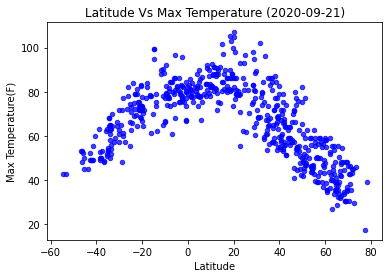

In [22]:
plt.scatter(summary_data["Latitude"],summary_data["Max Temp (F)"], marker="o", facecolors="blue",
            s=20, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title(f"Latitude Vs Max Temperature ({date.today()})")
plt.savefig('Output_data/Lat Vs Max Temp.png')
plt.show()

## Analysis
* Temperature seems to have a clear correlation with latitude
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). The southern hemisphere tends to be warmer this time of year than the northern hemisphere

## Latitude vs. Humidity Plot

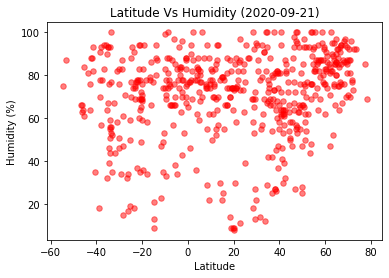

In [23]:

plt.scatter(summary_data["Latitude"],summary_data["Humidity (%)"], marker="o", facecolors="red",
            s=30, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude Vs Humidity ({date.today()})")
plt.savefig('Output_data/Lat Vs Humid.png')
plt.show()

## Analysis
* There is no strong relationship between latitude and humidity. However there is a slightly larger cluster of northern hemisphere cities with high humidity (above 60% humidity)

## Latitude vs. Cloudiness Plot

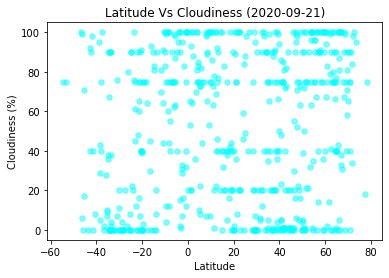

In [24]:
plt.scatter(summary_data["Latitude"],summary_data["Cloudiness (%)"], marker="o", facecolors="aqua",
            s=30, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude Vs Cloudiness ({date.today()})")
plt.savefig('Output_data/Lat Vs Cloudiness.png')
plt.show()

## Analysis
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities near 0, 80, and 90% cloudiness.

## Latitude vs. Wind Speed Plot

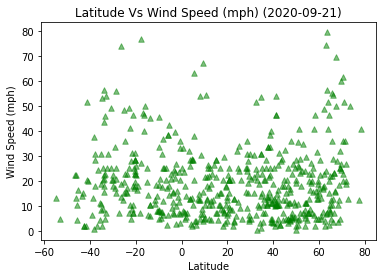

In [25]:
plt.scatter(summary_data["Latitude"],summary_data["Wind Speed (mph)"], marker="^", facecolors="green",
            s=30, alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude Vs Wind Speed (mph) ({date.today()})")
plt.savefig('Output_data/Lat Vs WindSpeed(mph).png')
plt.show()

## Analysis
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind
* Wind speed tends to generally be betweeen 0 and 20 mph regardless of latitude.

## Linear Regression

In [28]:
northern = summary_data.loc[summary_data["Latitude"] >= 0.0]
northern.reset_index(inplace=True)
northern

,index,City,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,1,Port Hardy,50.70,-127.42,51.80,93,90,2.39,CA,1600698585
1,2,Beringovskiy,63.05,179.32,40.03,90,100,23.96,RU,1600698585
2,3,Yanji,42.91,129.51,51.19,81,82,2.39,CN,1600698585
3,4,Kangaatsiaq,68.31,-53.46,34.43,86,100,3.89,GL,1600698585
4,6,Lompoc,34.64,-120.46,53.60,100,90,1.45,US,1600698577
...,...,...,...,...,...,...,...,...,...,...
377,551,Bairiki Village,1.33,172.98,80.60,78,20,18.01,KI,1600698729
378,552,Tabou,4.42,-7.35,78.17,83,83,28.63,CI,1600698730
379,553,Tando Ghulam Ali,25.13,68.87,96.46,39,88,24.16,PK,1600698730
380,554,Constitucion,23.99,-104.67,62.01,82,59,6.11,MX,1600698730


In [29]:
southern = summary_data.loc[summary_data["Latitude"] < 0.0]
southern.reset_index(inplace=True)
southern

,index,City,Latitude,Longitudes,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,0,Port Lincoln,-34.73,135.87,54.28,67,36,53.44,AU,1600698584
1,5,Aitape,-3.14,142.35,78.46,84,1,6.76,PG,1600698586
2,13,Kaitangata,-46.28,169.85,48.00,63,6,13.40,NZ,1600698587
3,18,Nueve de Julio,-35.44,-60.88,63.00,32,10,4.45,AR,1600698589
4,22,Jardim,-21.48,-56.14,72.36,69,65,9.10,BR,1600698590
...,...,...,...,...,...,...,...,...,...,...
172,544,Avarua,-21.21,-159.78,73.40,94,60,7.52,CK,1600698728
173,548,Carnarvon,-24.87,113.63,62.60,77,0,36.04,AU,1600698728
174,555,São João da Barra,-21.64,-41.05,75.20,78,48,31.47,BR,1600698730
175,556,Vila Velha,-20.33,-40.29,82.40,65,40,23.02,BR,1600698731


In [30]:
# Define plotting function
def plotLinearRegression(xdata,ydata,xlbl,ylbl,xy,figname):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"Output_data/{figname}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8465499913654035


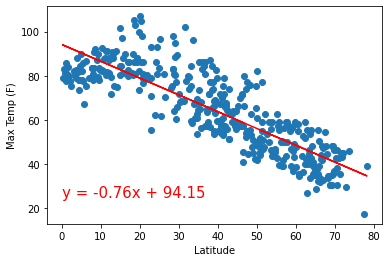

In [31]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Max Temp (F)"
xy = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,xy,"northern_latvsTemp(linear regress)")

* Northern Hemisphere - Max Temp vs Latitude: As the latitude increases (from the equator to the north pole), the maximum temperature decreases. This is a negative correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7925537047506402


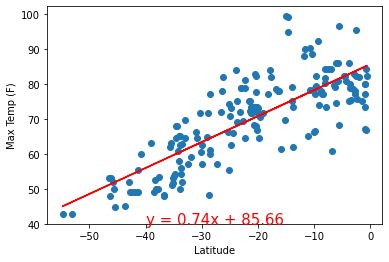

In [32]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Max Temp (F)"
xy = (-40,40)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,xy,"southern_latvsTemp(linear regress)")

* Southern Hemisphere - Max Temp vs Latitude Linear: As the latitude increases (from the south pole to the equator), the max temperature increaces. This is a positive correlation.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21696727882863373


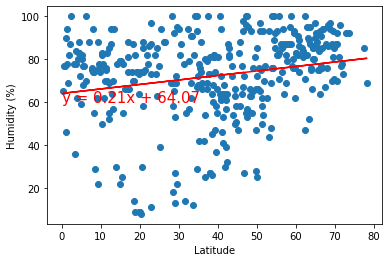

In [33]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
xy = (0,60)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,xy,"northern_latvshumidity(linear regress)")

* Northern Hemisphere - Latitude vs Humidity: There is slightly positive corelation between Latitude and Humidity 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0759025386306359


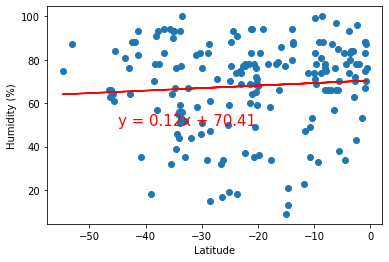

In [34]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
xy = (-45,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,xy,"southern_latvshumidity(linear regress)")

* Southern Hemisphere - Latitude vs Humidity: There is no corelation between Latitude and Humidity 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04186955317670707


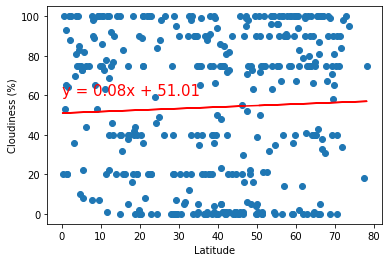

In [35]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Cloudiness (%)"
xy = (0,60)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,xy,"northern_latvscloudiness(linear regress)")

* Northern Hemisphere - Latitude vs Cloudiness: There is no corelation between Latitude and Cloudiness 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.284482462810393


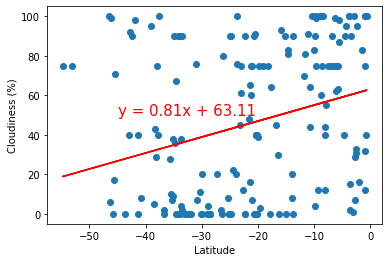

In [42]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Cloudiness (%)"
xy = (-45,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,xy,"southern_latvscloudiness(linear regress)")

* Southern Hemisphere - Latitude vs Cloudiness: There is slight corelation between Latitude and Cloudiness 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14707973054182646


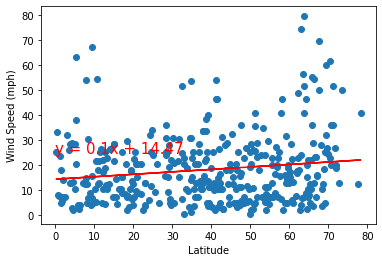

In [37]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Wind Speed (mph)"
xy = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,xy,"northern_latvswindspeed(linear regress)")

In [ ]:
* Southern Hemisphere - Latitude vs Cloudiness: There is n corelation between Latitude and Cloudiness 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.018655126512937634


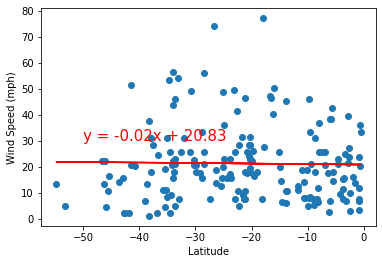

In [38]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Wind Speed (mph)"
xy = (-50,30)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,xy,"southern_latvswindspeed(linear regress)")